<a href="https://colab.research.google.com/github/ednavivianasegura/Curso_PLN/blob/main/PLN_EDNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1> Curso de especialización.
Estadística aplicada al procesamiento del lenguaje natural (PLN)</h1>
</center>

***

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/LogoCompleto.png?raw=1" alt="LogoUR" width="50%" height="50%">  
</center>

Librerías necesarias durante el proceso

In [59]:
# @title
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ¿Qué es el PLN?

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/que_Es_PLN.png?raw=1" alt="queesPLN" width="50%" height="50%">
</center>

In [2]:
# @title
# stopword_en = nltk.corpus.stopwords.words('english')

# #Creamos la lista de palabras
# stopwords = set(stopword_en)
# # stopwords.update(["br", "href"])
# text = "Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics, and machine learning techniques to analyze and understand human language. In NLP, words, tokens, and their frequency play a crucial role in building models for language inference. The foundation of Natural Language Processing lies in understanding the nominal, ordinal, and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher the semantics and syntax of words and sentences. In NLP, the power of machine learning models is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis, text summarization, and information extraction. Through the application of advanced algorithms, NLP practitioners strive to enhance the accuracy and efficiency of language processing systems. Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical framework for modeling linguistic phenomena and deriving meaningful insights from textual data. By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations within language corpora. In essence, Natural Language Processing is a multifaceted discipline that draws upon diverse domains such as linguistics, computer science, and artificial intelligence. By exploring the intricate interplay between words, semantics, and context, NLP researchers continue to push the boundaries of language understanding and machine intelligence."
# wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plt.imshow(wordcloud,cmap='PiYG_r')
# plt.axis("off")
# plt.tight_layout()
# plt.savefig("mapa_palabras.png", bbox_inches='tight', pad_inches=0, dpi=600)
# plt.show()





## ¿Cómo leen las máquinas?

<center>
  <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_leen_las_maquinas.png?raw=1" alt="como leen las maquinas" width="50%"
  height="50%">  
</center>

## ¿Para qué nos sirve la estadística en el PLN?

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_se_utiliza_la_Estadistica_en_pln.png?raw=1" alt="como se utiliza la estadistica en PLN" width="50%" height="50%">  
</center>


***
## ¡Comencemos!
***

## Contenido
### Tablas de frecuencias.
### Gráficos unidimensionales.
### Medidas de una variable cuantitativa:
* de posición:
  * media aritmética
  * mediana y cuantiles
  * moda
* de dispersión:
  * absoluta: recorrido, (cuasi)varianza y (cuasi)desviación típica
  * relativa: recorrido relativo, coeficiente de variación y valores tipificados
* Análisis de frecuencias de n-gramas.


***

### Notación:


Establecemos la siguiente notación para lo que sigue.
* De una variable $X$ tenemos $N$ datos (casos) que pueden ser repetidos o no: $𝑋_1,𝑋_2,…,𝑋_𝑁$ [en mayúsculas].
* Si solo indicamos los valores distintos entre sí: $𝑥_1,𝑥_2,…,𝑥_𝐾$ [en minúsculas] cada uno con su respectiva frecuencia $𝑛_1,𝑛_2,…,𝑛_𝐾$.
Notas:
$𝑁=𝑁_𝐾=𝑛_1+𝑛_2+⋯+𝑛_𝐾=∑𝑛_𝑖$ representa el número de casos (el tamaño de la muestra).
$𝐾$ representa el número de valores distintos entre sí de la variable $𝑋$.


***

## ¿Sabemos qué es una variable o qué tipo de variables existen?
*   Variables numéricas
  *   Discretas (rango finito): es un tipo de variable cuantitativa que solo puede tomar valores aislados, generalmente enteros, que se obtienen mediante un conteo. No admite valores intermedios o decimales. Ejemplo: el número de letras de una palabra.
  *   Continuas (rango infinito): es un tipo de variable cuantitativa que puede tomar cualquier valor dentro de un intervalo, que se obtienen mediante una medición. Admite valores intermedios o decimales. Ejemplo: la longitud de una palabra.

*   Variables categóricas: es un tipo de variable que suelen describir cualidades de los datos.
  *   Las variables ordinales: se pueden clasificar en cualquier rango. Ej: categorizar las palabras según su longitud en diferentes grupos ordenados, como:
        * Palabras cortas (1-3 caracteres)
        * Palabras de longitud media (4-6 caracteres)
        * Palabras largas (7 o más caracteres)
  *   Variables nominales: no se pueden clasificar, simplemente contienen nombres o números de categorías. Ej: categorías gramaticales, como sustantivos, verbos, adjetivos, adverbios, pronombres, preposiciones, conjunciones, entre otros.





## Ejemplo de conjunto de datos:

Conjunto de datos de *Amazon Fine Food Reviews de Kaggle* (archivo disponible en [Reviews.csv](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews))
Se cuenta con 568454 reseñas de productos de Amazon.
* Text – Reseña completa del artículo
* Summary – Breve resumen de la reseña.
* Score – Calificación del artículo proporcionada por el cliente.



In [39]:
# @title
df = pd.read_csv('/content/Reviews.csv')
df.shape

(568454, 10)

In [ ]:
# @title
df.columns
display(df.loc[:,['Id', 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text']].head())

,Id,ProductId,ProfileName,Score,Time,Summary,Text
0,1,B001E4KFG0,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Funciones importantes a usar durante el proceso

In [40]:
# @title
#Estas funciones se explican posteriormente

def group_by_sturges(df, column):
    num_bins = int(np.ceil(np.log2(len(df[column])) + 1))
    bin_width = (df[column].max() - df[column].min()) / num_bins
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{round(bin_edges[i],2)}-{round(bin_edges[i+1],2)})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def marca_de_clase(intervalo):
    limite_inferior, limite_superior = map(float, intervalo.strip("[]()").split('-'))
    return (limite_inferior + limite_superior) / 2

In [41]:
# @title
# Contar la longitud de las palabras en la columna 'texto'
df['Longitud_Texto'] = df['Text'].apply(lambda x: len(x.split()))

display(df.loc[:,['Id','Score', 'Summary', 'Text','Longitud_Texto']].head())


,Id,Score,Summary,Text,Longitud_Texto
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,48
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,94
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,41
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,27


## TABLA DE FRECUENCIAS

In [42]:
# @title
#Creamos la tabla de frecuencias de la variable "longitud de palabras":

frecuencias_long = df['Longitud_Texto'].value_counts()
frecuencias_long = frecuencias_long.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_long / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_long.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_long.index,
    'n_i': frecuencias_long.values,
    'f_i': frecuencias_relativas.values,
    'N_i':frecuencias_acumuladas.values,
    'F_i':frecuencias_relativas_acum.values
})


print("Tabla de frecuencias de la columna\n'Longitud del texto\n(número de palabras dentro de cada reseña)':\n")
display(tabla_frecuencias)



Tabla de frecuencias de la columna
'Longitud del texto
(número de palabras dentro de cada reseña)':



,x_i,n_i,f_i,N_i,F_i
0,3,2,0.000004,2,0.000004
1,4,1,0.000002,3,0.000005
2,5,1,0.000002,4,0.000007
3,6,8,0.000014,12,0.000021
4,7,51,0.000090,63,0.000111
...,...,...,...,...,...
993,2066,1,0.000002,568448,0.999989
994,2092,1,0.000002,568449,0.999991
995,2149,1,0.000002,568450,0.999993
996,2520,1,0.000002,568451,0.999995


## Intervalos:
Cada intervalo está determinado por sus límites. Esto es, el intervalo $𝑎⟷𝑏$ representa los valores comprendidos entre $𝑎$ y $𝑏$.


Si se requiere determinar la ubicación de los límites, estos pueden ser referidos con una notación más completa. Generalmente se utilizan intervalos abiertos por la izquierda y cerrados por la derecha: $(𝑎,𝑏]$. Esto es, incluye los valores comprendidos entre $𝑎$ y $𝑏$, $𝑏$ incluido y $𝑎$ excluido.

La amplitud de intervalo $𝑎⟷𝑏$ es $𝑏−𝑎$, que también es la amplitud de los intervalos $(𝑎,𝑏]$ y $[𝑎,𝑏)$ (este último intervalo representa los valores mayores o iguales que $𝑎$ y menores que $𝑏$). En las tablas de frecuencias los intervalos pueden ser de amplitud constante (más cómodo) o variable.

La densidad de frecuencia de un intervalo es la razón de su frecuencia absoluta sobre su amplitud. El intervalo $𝑖$ con frecuencia absoluta $𝑛_𝑖$ y amplitud $𝑎_𝑖$ tiene una densidad de frecuencia $ℎ_𝑖=𝑛_𝑖/𝑎_𝑖$.


En las variables cuantitativas la marca de clase de un intervalo es el valor concreto de la variable que representa cada intervalo, generalmente se toma el punto medio del intervalo. El punto medio de $(𝑎,𝑏]$ es: $(a+b)/2$. Para calcular medidas cuantitativas de una variable reducida por intervalos se usan las marcas de clase.








### TABLA DE FRECUECIAS POR INTERVALOS

Si una variable cuenta con una gran cantidad de valores distintos, como es el caso de la variable *Longitud del texto*, a menudo se resumen en una tabla de frecuencias, reduciéndola por intervalos. En este caso la frecuencia, $𝑛_𝑖$, es el número de casos cuyos valores se encuentran en el 𝑖-ésimo intervalo.

**Ejemplo**:

Resumimos los valores de la variable *Longitud del texto* por unos intervalos indicados.

Tras hacer el recuento obtenemos la siguiente tabla.

In [43]:
# @title
# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges'] = group_by_sturges(df, 'Longitud_Texto')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el método de sturges\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase = list(map(marca_de_clase, list(frecuencias_grupo.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Longitud_Texto = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'MarcaDeClase':MarcaDeClase})

print(tabla_frecuencias_Longitud_Texto)
# print(frecuencias_grupo.index)
# print(MarcaDeClase)



Frecuencias usando el método de sturges

                  x_i     n_i  MarcaDeClase
0        [3.0-166.29)  515441        84.645
1     [166.29-329.57)   43696       247.930
2     [329.57-492.86)    6595       411.215
3     [492.86-656.14)    1685       574.500
4     [656.14-819.43)     453       737.785
5     [819.43-982.71)     381       901.070
6     [982.71-1146.0)      80      1064.355
7    [1146.0-1309.29)      57      1227.645
8   [1309.29-1472.57)      33      1390.930
9   [1472.57-1635.86)      16      1554.215
10  [1635.86-1799.14)       5      1717.500
11  [1799.14-1962.43)       4      1880.785
12  [1962.43-2125.71)       3      2044.070
13   [2125.71-2289.0)       1      2207.355
14   [2289.0-2452.29)       0      2370.645
15  [2452.29-2615.57)       1      2533.930
16  [2615.57-2778.86)       0      2697.215
17  [2778.86-2942.14)       0      2860.500
18  [2942.14-3105.43)       0      3023.785
19  [3105.43-3268.71)       0      3187.070
20  [3268.71-3435.43)       3     

Podemos ver que hay varios intervalos con muy poca frecuencia, por lo que podemos unir los intervalos consecutivos en uno solo:

In [45]:
# @title
# agrupar los últimos grupos en uno solo:

lista=[ '[1472.57-1635.86)', '[1635.86-1799.14)',
                  '[1799.14-1962.43)', '[1962.43-2125.71)', '[2125.71-2289.0)',
                  '[2289.0-2452.29)', '[2452.29-2615.57)', '[2615.57-2778.86)',
                  '[2778.86-2942.14)', '[2942.14-3105.43)',
                  '[3105.43-3268.71)', '[3268.71-3435.43)']

# Reemplazar los valores en la columna 'columna_original' con ">1472.571" si coinciden con los valores de la lista
df['group_sturges'] = df['group_sturges'].replace(lista, '[1472.571-3435.43]')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr = frecuencias_grupo / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr = frecuencias_grupo.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr = frecuencias_acumuladas_gr / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_gr = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'f_i': frecuencias_relativas_gr.values,
    'N_i':frecuencias_acumuladas_gr.values,
    'F_i':frecuencias_relativas_acum_gr.values
})


print("Tabla de frecuencias agrupadas por intervalo de la columna\n'Longitud del texto':\n")
display(tabla_frecuencias_gr)


Tabla de frecuencias agrupadas por intervalo de la columna
'Longitud del texto':



,x_i,n_i,f_i,N_i,F_i
0,[3.0-166.29),515441,0.906742,515441,0.906742
1,[166.29-329.57),43696,0.076868,559137,0.983610
2,[329.57-492.86),6595,0.011602,565732,0.995212
3,[492.86-656.14),1685,0.002964,567417,0.998176
4,[656.14-819.43),453,0.000797,567870,0.998973
5,[819.43-982.71),381,0.000670,568251,0.999643
6,[982.71-1146.0),80,0.000141,568331,0.999784
7,[1146.0-1309.29),57,0.000100,568388,0.999884
8,[1309.29-1472.57),33,0.000058,568421,0.999942
9,[1472.571-3435.43],33,0.000058,568454,1.000000


### Ejercicio 1:

Observa la tabla de frecuencias del puntaje (score) de las reseñas de Amazon y contesta a las siguientes preguntas:


1.   ¿Cuántas reseñas fueron valoradas con 4?
2.   ¿Cuántas reseñas fueron valoradas con menos de 3?
3.   ¿Cuántas reseñas tienen 4 o menos de valoración?
4.   ¿Cuántas reseñas tienen más de 4 puntos de valoración?
5.   ¿Cuál es la proporción de reseñas con puntaje igual a 3?
6.   ¿Cuál es la proporción de reseñas menores a 3?
7.   ¿Cuál es la proporción de reseñas mayores de 2?



In [46]:
# @title
# Calcular la tabla de frecuencias de la columna 'Score'
frecuencias_score = df['Score'].value_counts()
frecuencias_score = frecuencias_score.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_score / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_score.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)


# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_score.index,
    'n_i': frecuencias_score.values,
    'f_i': frecuencias_relativas.values,
    "N_i":frecuencias_acumuladas.values,
    "F_i":frecuencias_relativas_acum.values
})
display(tabla_frecuencias)

,x_i,n_i,f_i,N_i,F_i
0,1,52268,0.091948,52268,0.091948
1,2,29769,0.052368,82037,0.144316
2,3,42640,0.075010,124677,0.219326
3,4,80655,0.141885,205332,0.361211
4,5,363122,0.638789,568454,1.000000


***


In [ ]:
# @title
print("1. ¿Cuántas reseñas fueron valoradas con 4?: 36897")
print("2. ¿Cuántas reseñas fueron valoradas con menos de 3?: 37066")
print("3. ¿Cuántas reseñas tienen 4 o menos de valoración?: 93852")
print("4. ¿Cuántas reseñas tienen más de 4 puntos de valoración?: 523941")
print("5. ¿Cuál es la proporción de reseñas con puntaje igual a 3?: 0.078321")
print("6. ¿Cuál es la proporción de reseñas menores a 3?: 0.145963")
print("7. ¿Cuál es la proporción de reseñas mayores de 2?: 0.145298+0.630418 = 0.775716")

## GRÁFICOS UNIDIMENSIONALES

Para variables **discretas** (toman pocos valores distintos):

* Gráficos de sectores: cada valor ocupa un sector circular cuya proporción de área (con respecto al círculo que representa el total) es la frecuencia relativa.  
* Gráficos de barras. De dos tipos:
  * de valores: una barra por cada caso ($𝑁$ barras), de manera que la altura de barra 𝑖-ésima expresa el valor 𝑋_𝑖;
  * de frecuencias: una barra por cada valor distinto $𝑥_𝑖$, de manera que la altura de la barra $𝑥_𝑖$ expresa su frecuencia absoluta $𝑛_𝑖$.

Para variables **continuas** (toman un amplio rango de posibles valores):
* histogramas.
Son gráficos de rectángulos pegados cuyas bases representan los intervalos determinados y cuyas alturas representan sus densidades ($ℎ_𝑖/𝑁$).

Se puede considerar que son gráficos de barras de frecuencias especiales.


### Gráfico de sectores:

Text(0.5, 1.0, 'Gráfico de frecuencia del Score')

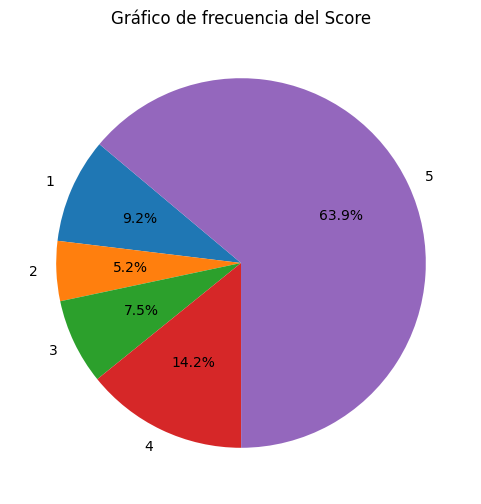

In [48]:
# @title
sizes = tabla_frecuencias.n_i
labels = tabla_frecuencias.x_i

plt.figure(figsize=(6, 6))  # Tamaño del gráfico (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Agregar un título
plt.title('Gráfico de frecuencia del Score')

### Gráfico de barras de valores:

Malo (1-3)     124677
Bueno (4-5)    443777
Name: sentiment, dtype: int64


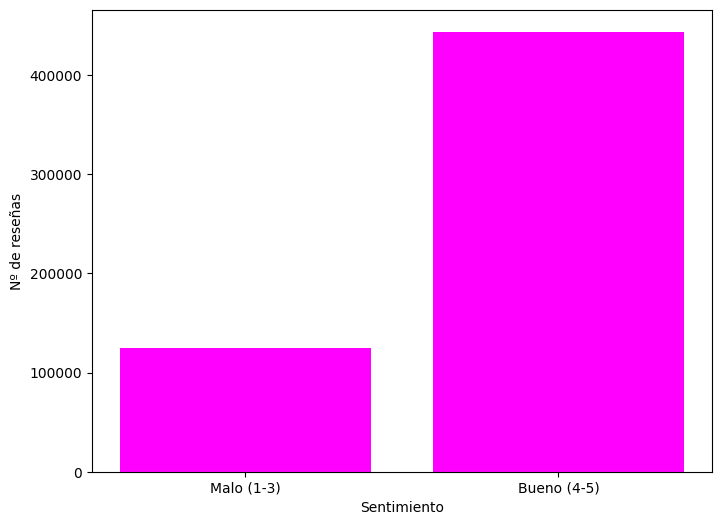

In [49]:
# @title
#Primero clasificaremos las reseñas en doos grupos (buenas o malas)
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
df['sentiment'] = pd.cut(df['Score'], bins=[1,4,6], labels=['Malo (1-3)', 'Bueno (4-5)'], right=False)

frecuencias_sentiment = df['sentiment'].value_counts()
frecuencias_sentiment = frecuencias_sentiment.sort_index()

print(frecuencias_sentiment)

# Datos de ejemplo
labels = frecuencias_sentiment.index
sizes = frecuencias_sentiment.values

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
plt.bar(labels, sizes, color='magenta')

# Agregar etiquetas y título
plt.ylabel('Nº de reseñas')
plt.xlabel('Sentimiento')
# plt.title('Gráfico de sentimeinto')

# Mostrar el gráfico
plt.show()

### Histograma:

Histograma del puntaje de las reseñas (Score):


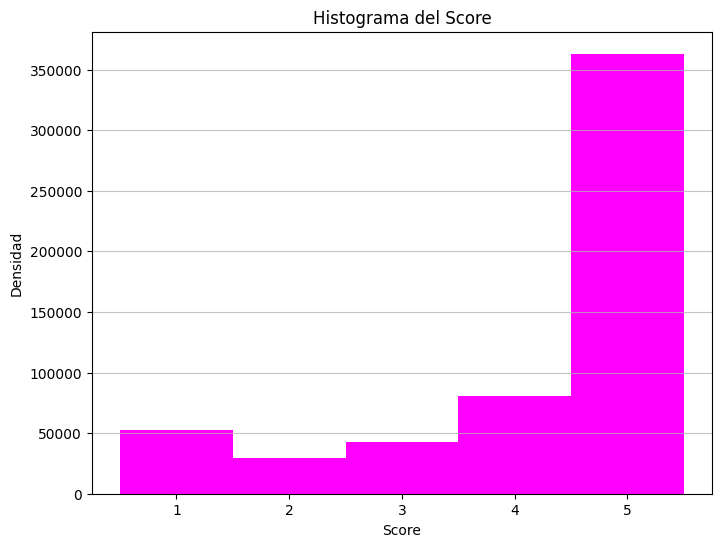

Frecuencia del bin 1.0 - 2.0: 52268.0
Frecuencia del bin 2.0 - 3.0: 29769.0
Frecuencia del bin 3.0 - 4.0: 42640.0
Frecuencia del bin 4.0 - 5.0: 80655.0
Frecuencia del bin 5.0 - 6.0: 363122.0


In [50]:
# @title
data=list(df['Score'].values)
# Crear el histograma con las barras juntas y densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

# Agregar etiquetas y título
plt.xlabel('Score')
plt.ylabel('Densidad')
plt.title('Histograma del Score')

# Mostrar el histograma
plt.grid(axis='y', alpha=0.75)
plt.show()

#para mostrar las frecuencias reltativas en vez de las aboslutas usar: values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

for i in range(len(values)):
    print(f"Frecuencia del bin {bins[i]} - {bins[i+1]}: {values[i]}")

## Medidas de tendencia central

Para hacer manejable la masa de datos procedentes de la observación estadística, es necesario resumir el volumen de los datos. Ya hemos visto cómo reducir y organizar la masa de datos con las tablas de frecuencias.

En el caso de las **variables cuantitativas**, es posible reducir aún más esta información, valiéndonos de unos pocos valores que las describan y caractericen. Estos valores, que llamamos estadísticos, nos indican las características más importantes de las distribuciones de frecuencias y se suelen clasificar en los siguientes grupos:

* de posición:
    * media aritmética
    * mediana
    * cuantiles
    * moda
* de dispersión:
    * (cuasi)varianza
    * (cuasi)desviación típica
    * coeficiente de variación
* de concentración: índice de Gini.

### Medidas de posición:

Las medidas de posición resumen la distribución de los valores de una variable.

Para que un valor pueda ser considerado una medida de posición tiene que tomar un valor comprendido entre el mínimo y el máximo de la variable.

Existen dos tipos de medidas de posición: las centrales y las no centrales.

De las medidas de posición central, las más utilizadas son: la media aritmética, la mediana y la moda.

Los cuantiles son las medidas de posición no central.


## Media Aritmética

La media aritmética es la suma de todos los valores observados de la distribución, dividida por el número total de casos.
$$\hat{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}𝑋_{𝑖} =\frac{(𝑋_1+𝑋_2+…+𝑋_𝑁)}{N}$$.

Si tenemos $𝐾$ valores distintos que se repiten, y conocemos sus frecuencias, podemos calcular la media como:
$$\hat{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}n_{𝑖}𝑥_{𝑖} =\frac{(𝑛_1 𝑥_1+𝑛_2 𝑥_2+…+𝑛_𝑘 𝑥_𝐾)}{N}$$.

### Ejercicios:

Calcular la media aritmética en las siguientes situaciones.

1. Para la variable $X=(4, 7, 5, 7, 5, 4, 2, 7)$.

2. Para la variable **Longitud_Texto**:

    Sabiendo que $\sum 𝑋_{𝑖} = 45626405$ y $n= 568454$

3. Usando la reducción por intervalos de la tabla de frecuencias de la variable **Longitud_Texto** (Cálculo de la marca de clase)


### Media aritmética de datos agrupados:

In [51]:
# Mostrar la tabla de frecuencias con la marca de clase
print(tabla_frecuencias_Longitud_Texto[['x_i','MarcaDeClase','n_i']])



                  x_i  MarcaDeClase     n_i
0        [3.0-166.29)        84.645  515441
1     [166.29-329.57)       247.930   43696
2     [329.57-492.86)       411.215    6595
3     [492.86-656.14)       574.500    1685
4     [656.14-819.43)       737.785     453
5     [819.43-982.71)       901.070     381
6     [982.71-1146.0)      1064.355      80
7    [1146.0-1309.29)      1227.645      57
8   [1309.29-1472.57)      1390.930      33
9   [1472.57-1635.86)      1554.215      16
10  [1635.86-1799.14)      1717.500       5
11  [1799.14-1962.43)      1880.785       4
12  [1962.43-2125.71)      2044.070       3
13   [2125.71-2289.0)      2207.355       1
14   [2289.0-2452.29)      2370.645       0
15  [2452.29-2615.57)      2533.930       1
16  [2615.57-2778.86)      2697.215       0
17  [2778.86-2942.14)      2860.500       0
18  [2942.14-3105.43)      3023.785       0
19  [3105.43-3268.71)      3187.070       0
20  [3268.71-3435.43)      3352.070       3


In [52]:
marcas_de_clase =  tabla_frecuencias_Longitud_Texto['MarcaDeClase']
frecuencias     =  tabla_frecuencias_Longitud_Texto['n_i']
# Calculando la suma de los productos de las marcas de clase y las frecuencias
suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # Calculando el total de observaciones
total_observaciones = sum(frecuencias)

# # Calculando la media aritmética
media_aritmetica = suma_productos / total_observaciones

print("La media aritmética es:", round(media_aritmetica,2))

La media aritmética es: 103.94


In [53]:
# @title
X = [4, 7, 5, 7, 5, 4, 2, 7]
x_hat = round(sum(X) / len(X),2)
# Imprimir el texto junto con la variable y su valor
print(f"1. Para la variable X = {X}: \u0302x={x_hat}")

# Para la variable Longitud_Texto:
x_hat = round(df["Longitud_Texto"].mean(),2)
suma = df["Longitud_Texto"].sum()
n = df.shape[0]
print(f"2. Para la variable Longitud_Texto: \u0302x={suma}/{n}={x_hat}")

x_hat = media_aritmetica

print(f"3. Para la variable Longitud_Texto en datos agrupados:\n\u0302x=𝟏/𝟓𝟔𝟖𝟒𝟓𝟒∗(𝟖𝟒.𝟔𝟓∗𝟓𝟏𝟓𝟒𝟒𝟏+𝟐𝟒𝟕.𝟗𝟑∗𝟒𝟑𝟔𝟗𝟔+𝟒𝟏𝟏.𝟐𝟐∗𝟔𝟓𝟗𝟖+…+𝟐𝟒𝟓𝟒∗𝟑𝟑)={x_hat}")


1. Para la variable X = [4, 7, 5, 7, 5, 4, 2, 7]: ̂x=5.12
2. Para la variable Longitud_Texto: ̂x=45626405/568454=80.26
3. Para la variable Longitud_Texto en datos agrupados:
̂x=𝟏/𝟓𝟔𝟖𝟒𝟓𝟒∗(𝟖𝟒.𝟔𝟓∗𝟓𝟏𝟓𝟒𝟒𝟏+𝟐𝟒𝟕.𝟗𝟑∗𝟒𝟑𝟔𝟗𝟔+𝟒𝟏𝟏.𝟐𝟐∗𝟔𝟓𝟗𝟖+…+𝟐𝟒𝟓𝟒∗𝟑𝟑)=103.93717884824451


### Media aritmética: pros



Tiene en cuenta **todos los valores observados**.

Es **fácil de calcular.**

Tiene un **claro significado estadístico:** representa el valor que tomaría cada una de las observaciones si el total se repartiera de manera equitativa.

Es **única**.

### Media aritmética: contra

Los valores extremos ejercen gran influencia sobre el valor de la media aritmética (un valor extremo es un dato excepcionalmente pequeño o grande en comparación con el resto)




In [55]:
Datos1 = [2,5,7,9,12]
Datos2 = [2,5,7,9,125]
Datos = pd.DataFrame({
    'Datos1': Datos1,
    'Datos2': Datos2
})
display(Datos)

,Datos1,Datos2
0,2,2
1,5,5
2,7,7
3,9,9
4,12,125


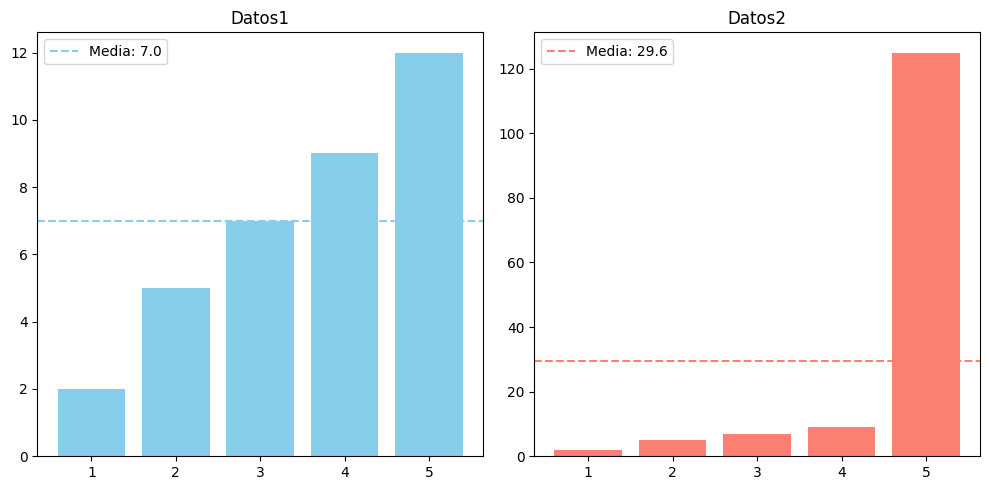

La media de los Datos 1 es 7.0

La media de los Datos 2 es 29.6


In [65]:
# Calcular las medias de Datos1 y Datos2
media_datos1 = sum(Datos1) / len(Datos1)
media_datos2 = sum(Datos2) / len(Datos2)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para Datos1
axs[0].bar(range(len(Datos1)), Datos1, color='skyblue')
axs[0].axhline(y=media_datos1, color='skyblue', linestyle='--', label=f'Media: {media_datos1}')
axs[0].set_title('Datos1')
axs[0].set_xticks(range(len(Datos1)))
axs[0].set_xticklabels(range(1, len(Datos1) + 1))
axs[0].legend()

# Gráfico de barras para Datos2
axs[1].bar(range(len(Datos2)), Datos2, color='salmon')
axs[1].axhline(y=media_datos2, color='salmon', linestyle='--', label=f'Media: {media_datos2}')
axs[1].set_title('Datos2')
axs[1].set_xticks(range(len(Datos2)))
axs[1].set_xticklabels(range(1, len(Datos2) + 1))
axs[1].legend()

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print(f'La media de los Datos 1 es {media_datos1}\n\nLa media de los Datos 2 es {media_datos2}')

### Media aritmética: propiedades

La suma de las desviaciones de los valores de la variable, respecto a su media aritmética, es igual a cero:
$$\sum(𝑋_{𝑖}−\hat{X})=\sum𝑋_{𝑖}−𝑁\hat{X} = 0 $$.

Si transformamos los valores de la variable  a través de un cambio de origen y escala $(U=𝑎+𝑏𝑋)$, la media aritmética de la variable transformada es $\hat{U}= 𝑎+𝑏\hat{X}$.

* En particular (para $𝑏=1$) si $U=𝑎+𝑋$ entonces $\hat{U}= 𝑎+\hat{X}$.

* Ejemplo. Estatura de $𝑁=8$ personas (en cm.) $𝑋=(173, 168, 161, 175, 171, 169,171,170)$. Para calcular $\hat{X}$ *a mano*, es más cómodo tomar $𝑌=𝑋−171 que sumar directamente los valores de 𝑋 (∑▒𝑋_𝑖 =1358).

Si dividimos todas las observaciones en $$ grupos disjuntos, cada uno de ellos con media $\hat{x}_{i}$ y tamaño $𝑁_{𝑖}$, la media aritmética de todo el conjunto se puede calcular como
$$\hat{X}=(\hat{X}_{1}N_{1}+…+\hat{X}_{k}N_{k})/𝑁$$.
